## Image Processing

[<img align="right" src="img/opencv_logo.png" />](http://opencv.org/)
In this module, we will use [OpenCV](http://opencv.org/) in Python to process the images coming through the camera from the simulated Pioneer 3DX.

OpenCV (Open Source Computer Vision) is a library of programming functions mainly aimed at real-time computer vision.

In our task, the goal is to detect the location of the target line and follow it around the course. There are many strategies that can be used for that purpose, whose complexity increases with variability and noise. In our case, we are just going to consider an optimally painted, optimally illuminated bright cyan line.

The strategy will be to filter a block of rows of the image by color and drive the robot toward the center of the pixels that pass the color filter.

First, we initialize the robot, launch the widgets, and display the camera image.

In [1]:
import packages.initialization
import pioneer3dx as p3dx
p3dx.init()

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import motion_widget

In [4]:
import tilt_widget

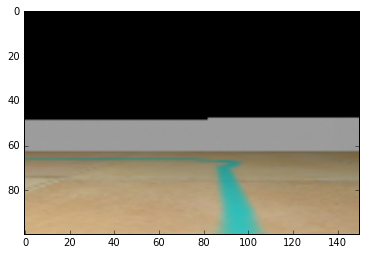

In [5]:
plt.imshow(p3dx.image);

### Color Filtering

[<img align="right" src="img/rgb_hsv.png" />](https://en.wikipedia.org/wiki/HSL_and_HSV)
The first idea would be to find the red, green, blue (RGB) values of a cyan image pixel and filter for nearby RGB values. Unfortunately, filtering on RGB values turns out to be a poor way to find a particular color in an image, since the raw values are a function of the overall brightness as well as the color of the object. Slightly different lighting conditions would result in the filter failing to perform as intended.

Instead, a better technique for filtering by color is to transform RGB images into [hue, saturation, value (HSV)](https://en.wikipedia.org/wiki/HSL_and_HSV) images. The HSV image separates the RGB components into hue (color), saturation (color intensity), and value (brightness). Once the image is in this form, we can then apply a threshold for hues near cyan to obtain a *binary image* in which pixels are either true (meaning they pass the filter) or false (they do not pass the filter).

In [6]:
import cv2
import numpy

In [7]:
hsv = cv2.cvtColor(p3dx.image, cv2.COLOR_RGB2HSV)

The [cyan color](http://www.colorhexa.com/00ffff) has a hue angle of 180 degrees (of 360), a saturation of 100% and a value of 100%. However, since OpenCV uses a different scale (H: 0 - 180, S: 0 - 255, V: 0 - 255), the cyan hue angle will be 90 units.

In real lighting conditions, colors are not defined by single values, but by intervals, so we will use an interval of $\pm 10$ units around the central value. 

Since the illumination is not extremely bright, the thresholds for saturation and value are set to 100. 

In [8]:
lower_cyan = numpy.array([80, 100, 100])
upper_cyan = numpy.array([100, 255, 255])

The mask is computed by the [OpenCV function `inRange`](http://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#inrange).

In [9]:
mask = cv2.inRange(hsv, lower_cyan, upper_cyan)

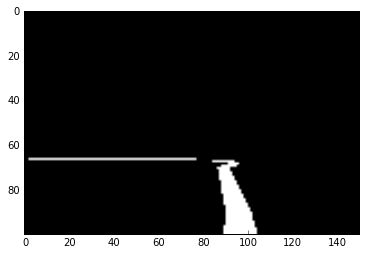

In [10]:
plt.imshow(mask,cmap='gray');

Next: [Line Detection](Line%20Detection.ipynb)

---
#### Try-a-Bot: an open source guide for robot programming
Developed by:
[![Robotic Intelligence Lab @ UJI](img/logo/robinlab.png "Robotic Intelligence Lab @ UJI")](http://robinlab.uji.es)

Sponsored by:
<table>
<tr>
<td style="border:1px solid #ffffff ;">
<a href="http://www.ieee-ras.org"><img src="img/logo/ras.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="http://www.cyberbotics.com"><img src="img/logo/cyberbotics.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="http://www.theconstructsim.com"><img src="img/logo/theconstruct.png"></a>
</td>
</tr>
</table>

Follow us:
<table>
<tr>
<td style="border:1px solid #ffffff ;">
<a href="https://www.facebook.com/RobotProgrammingNetwork"><img src="img/logo/facebook.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="https://www.youtube.com/user/robotprogrammingnet"><img src="img/logo/youtube.png"></a>
</td>
</tr>
</table>